In [ ]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt

# Линейная регрессия

## Аналитическое решение для парной регрессии (немного теории со слайдов)

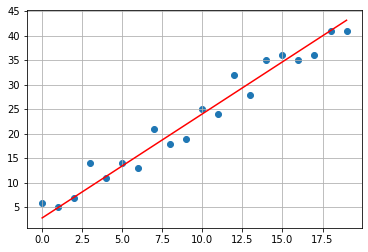

In [ ]:
x = np.arange(20)
y = 2*x + 4
y = y + np.random.randint(-3, 5 ,20)

plt.scatter(x, y)
plt.plot(x, 2.12*x + 2.86, 'r')
plt.grid()

### Наша задача:
$$a(x) = w_0 + w_1 x$$

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}(a(x_i) - y_i)^2 \Rightarrow  \min_{w}$$

####  Подставим сюда явный вид для  $a(x) $

Получим такое выражение:

$Q(w,x) = \frac{1}{l}\sum^l_{i=1}(w_0 + w_1x_i - y_i)^2 \Rightarrow  \min_{w}$

Чтобы эта функция достигла своего минимума, нужно чтобы частные производные от  $w_0$  и  $w_1 $ были равны нулю

$$\left(\frac{\partial Q}{\partial w_0},\frac{\partial Q}{\partial w_1}\right) = 0$$

#### Берем эти производные...

$ \frac{\partial Q}{\partial w_0} = \frac{2}{l}\sum^l_{i=1}( w_0 + w_1x_i  - y_i) = 0 $




$ w_0\frac{1}{l}\sum 1  + w_1\frac{1}{l}\sum x_i - \frac{1}{l}\sum y_i = 0$


$ w_0  + w_1 \overline{x} - \overline{y}  = 0$  , где $\overline{y} = \frac{1}{l}\sum^l_{i=1}y_i$

Получаем выражения для весовых коэфициентов:

$$w_0 = \overline{y} - w_1 \overline{x}$$

####  Теперь берем производную по $w_1$:

$ \frac{\partial Q}{\partial w_1} = \frac{2}{l}\sum^l_{i=1}(w_0 + w_1 x_i - y_i) x_i = 0$



$0 = w_0\frac{1}{l}\sum^l_{i=1}x_i + w_1\frac{1}{l}\sum^l_{i=1}x_i^2 - \frac{1}{l}\sum^l_{i=1}x_i y_i =$
$ w_0 \overline{x} + w_1\overline{x^2} - \overline{xy}$

Подставим выражение для $w_0$

$(\overline{y} - w_1\overline{x})\overline{x} + w_1\overline{x^2} - \overline{xy} = 0$


$$ w_1 = \frac{\overline{(x y)}-\overline{x} \overline{y}}{\overline{(x^2)}-( \overline{x} )^2}  $$

## Практика 1
Напишите функцию восстановления параметров линейной регрессии для одномерного случая

$$a(x) = w_0 + w_1 x$$

$$Q(w,x) = \frac{1}{l}\sum^l_{i=1}(a(x_i) - y_i)^2 \Rightarrow  \min_{w}$$


, используя аналитическое решение

$$ w_1 = \frac{\overline{(x y)}-\overline{x} \overline{y}}{\overline{(x^2)}-( \overline{x} )^2}  $$

$$ w_0 = \overline{y}-w_1\overline{x}  $$

,где $ \overline{x} = \frac{1}{l}(x_1 + ... + x_l) = \frac{1}{l}\sum^l_{i=1} x_i$

In [ ]:
def find_w0_w1(X, y):
    w1 = ((X*y).mean() - X.mean() * y.mean()) / ((X**2).mean() - (X.mean()**2))
    w0 = y.mean() - w1 * X.mean()
    return w0, w1


In [ ]:
np.array([1,2,3,4,5]) - np.array([0,1,2,3,4])

array([1, 1, 1, 1, 1])

### Проверьте работоспособность функции на трех точках:

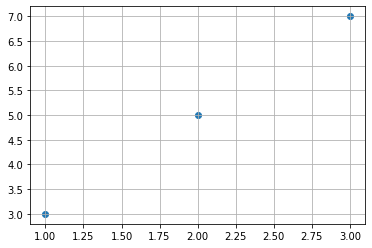

In [ ]:
plt.scatter(np.array([1,2,3]), np.array([3, 5, 7]))
plt.grid()

In [ ]:
find_w0_w1(np.array([1,2,3]), np.array([3, 5, 7]))

(1.0, 2.0)

### Восстановите прямую для набора данных:

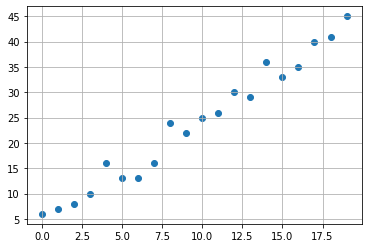

In [ ]:
x = np.arange(20)
y = 2*x + 4
y = y + np.random.randint(-3, 5 ,20)

plt.scatter(x, y)
plt.grid()

In [ ]:
w0,w1 = find_w0_w1(x, y)
w0,w1

(4.3999999999999915, 2.0368421052631587)

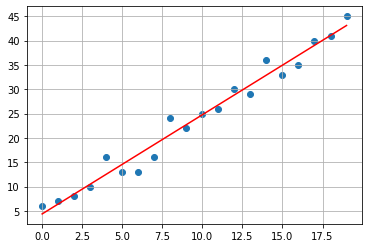

In [ ]:
plt.scatter(x, y)
plt.plot(x, w1*x + w0, 'r')
plt.grid()

## Практика 2
Напишите функцию расчета среднеквадратичной ошибки (mse)

$$ mse = Q(w,x) = \frac{1}{l}\sum^l_{i=1}(a(x_i) - y_i)^2 $$

и функцию расчета коэффициент детерминации $R^2$

$$R^2 = 1 - \frac{\sum^l_{i=1}(y_i - \hat{y_i})^2}{\sum^l_{i=1}(y_i - \overline{y})^2}$$
, где $\overline{y} = \frac{1}{l}\sum^l_{i=1}y_i$

и $\hat{y_i}$ - прогноз для i-го объекта

In [ ]:
def calc_mse(y, y_pred):
#  your code
    mse = ((y_pred - y) ** 2).mean()
    return mse

In [ ]:
def calc_r_squared(y, y_pred):
  R = 1 - ((y-y_pred)**2).sum() / ((y - y.mean())**2).sum()
  return R

In [ ]:
# проверка - должно получиться 1.0
calc_r_squared(np.array([1,2,3,4,5,6]), np.array([1,2,3,4,5,6]))

1.0

## Практика 3
- Загрузите данные из файла **flats.csv** (целевой признак - price)

- Удалите объекты с пустыми значениями

- Убедитесь в том, что признак livesp подходит для построения линейной регрессии (визуализируйте)

- Восстановите параметры линейной модели и визуализируйте решение

- Постройте вектор прогнозов по признаку livesp

- Посчитайте среднеквадратичную ошибку

- Посчитайте коэфициент детерминации

### Признаки датасета
 |признак|описание|
 |-------|--------|
 |n|порядковый номер|
 |price|стоимость|
 |totsp|общая площадь|
 |livesp|жилая площадь|
 |kitsp|площадь кухни|
 |dist|расстояние от центра|
 |metrdist|растояние от метро|
 |walk|пешая доступность|
 |brick|кирпичный дом|
 |floor|этаж|



In [ ]:
df = pd.read_csv('flats.csv')
df

FileNotFoundError: ignored

In [ ]:
df = df.dropna()
df

NameError: ignored

In [ ]:
X = df['livesp']
y = df['price']

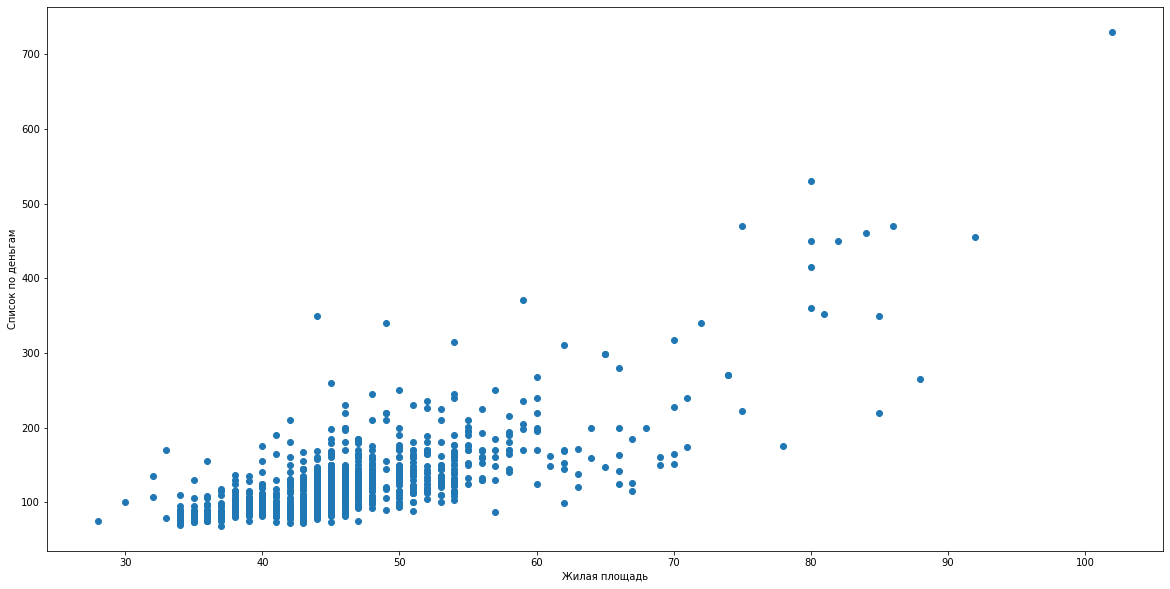

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.xlabel('Жилая площадь')
plt.ylabel('Список по деньгам')
plt.show()

In [ ]:
w0, w1 = find_w0_w1(X, y)
y_pred = 20 + w1*X

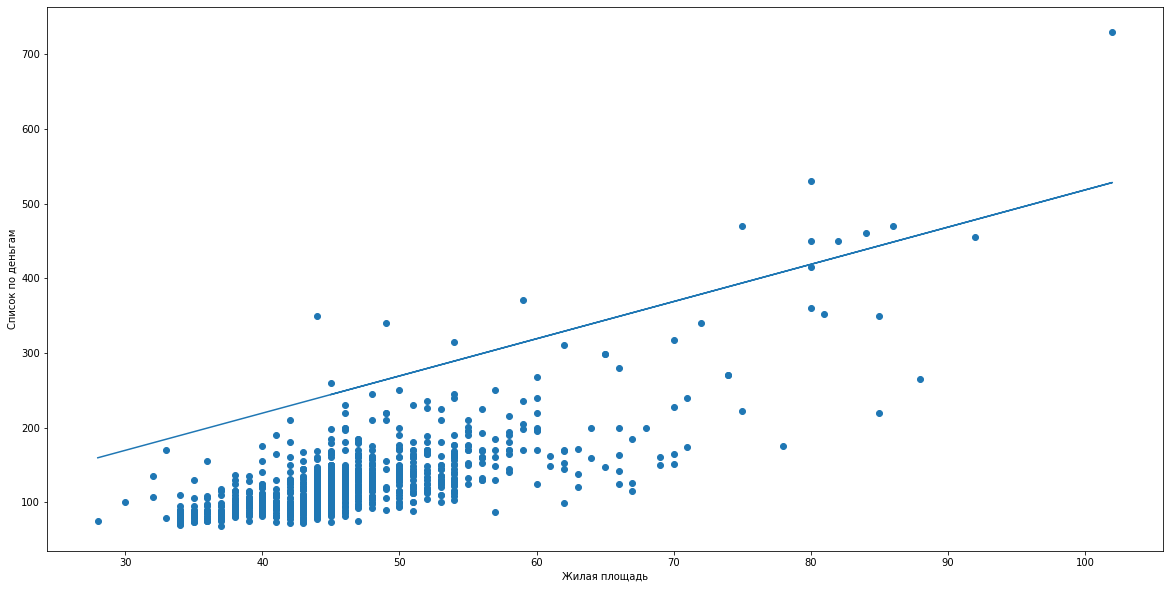

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel('Жилая площадь')
plt.ylabel('Список по деньгам')
plt.show()

In [ ]:
calc_mse(y, y_pred)

16455.02150930249

In [ ]:
calc_mse(y, y_pred) ** 0.5

128.27712777148733

In [ ]:
calc_r_squared(y, y_pred)

-4.3897960700566125

## Практика 4
Выполните задания Практики 3 с признаком totsp:
- восстановите параметры линейной модели
- постройте вектор прогнозов цены
- посчитайте mse и $R^2$
- визуализируйте объекты и восстановленную прямую

Целевым признаком остается price

In [ ]:
#  your code

**Занатие 2**

In [ ]:
df = pd.read_csv('flats.csv').dropna()
df

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1.0,75.0,44.0,28.0,6,"13,5",7.0,1.0,0.0,1.0,6.0
1,2.0,95.0,61.0,37.0,6,"13,5",7.0,1.0,0.0,1.0,1.0
2,3.0,88.0,55.0,36.0,6,9,5.0,1.0,1.0,0.0,4.0
3,4.0,225.0,80.0,56.0,9,9,5.0,1.0,1.0,1.0,3.0
4,5.0,140.0,86.0,51.0,10,"12,7",10.0,1.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,97.0,72.0,43.0,10,"12,7",10.0,0.0,0.0,1.0,5.0
996,997.0,95.0,60.0,43.0,6,9,5.0,0.0,0.0,1.0,4.0
997,998.0,95.0,60.0,46.0,5,"10,5",5.0,1.0,0.0,1.0,7.0
998,999.0,129.0,76.0,48.0,10,"12,5",5.0,0.0,0.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n         1000 non-null   float64
 1   price     1000 non-null   float64
 2   totsp     1000 non-null   float64
 3   livesp    1000 non-null   float64
 4   kitsp     1000 non-null   object 
 5   dist      1000 non-null   object 
 6   metrdist  1000 non-null   float64
 7   walk      1000 non-null   float64
 8   brick     1000 non-null   float64
 9   floor     1000 non-null   float64
 10  code      1000 non-null   float64
dtypes: float64(9), object(2)
memory usage: 93.8+ KB


In [ ]:
df['kitsp'] = df['kitsp'].apply(lambda x:float(x.replace(',','.')))
df['dist'] = df['dist'].apply(lambda x:float(x.replace(',','.')))

In [ ]:
X = df.loc[:, 'totsp':'code']
X['one'] = 1
y = df['price']
X

,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code,one
0,44.0,28.0,6.0,13.5,7.0,1.0,0.0,1.0,6.0,1
1,61.0,37.0,6.0,13.5,7.0,1.0,0.0,1.0,1.0,1
2,55.0,36.0,6.0,9.0,5.0,1.0,1.0,0.0,4.0,1
3,80.0,56.0,9.0,9.0,5.0,1.0,1.0,1.0,3.0,1
4,86.0,51.0,10.0,12.7,10.0,1.0,0.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...
995,72.0,43.0,10.0,12.7,10.0,0.0,0.0,1.0,5.0,1
996,60.0,43.0,6.0,9.0,5.0,0.0,0.0,1.0,4.0,1
997,60.0,46.0,5.0,10.5,5.0,1.0,0.0,1.0,7.0,1
998,76.0,48.0,10.0,12.5,5.0,0.0,0.0,1.0,3.0,1


In [ ]:
linalg.lstsq(X, y, rcond=None)

(array([  1.5598298 ,   1.65841583,   1.34920618,  -2.85620655,
         -1.03082642,  10.1903162 ,   8.80214444,   5.13482723,
         -2.27514922, -39.43360625]),
 array([976880.59940466]),
 10,
 array([2849.01086974,  163.06449552,  126.38159929,  110.36998881,
          71.33549781,   54.13735883,   14.95422895,   13.09389419,
          12.30297396,    3.59753675]))

In [ ]:
W = linalg.lstsq(X, y, rcond=None)[0]

In [ ]:
y_pred = X.dot(W)
y_pred[0]

39.62946009094322

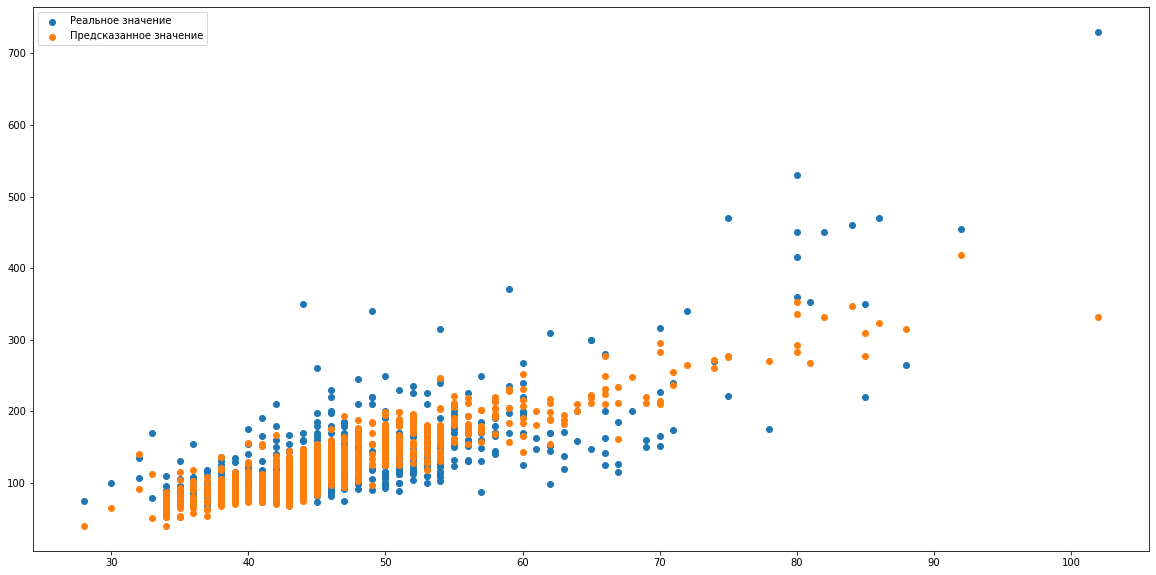

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(X['livesp'], y, label = 'Реальное значение')
plt.scatter(X['livesp'], y_pred, label = 'Предсказанное значение')
plt.legend()
plt.show()

In [ ]:
calc_mse(y, y_pred), calc_mse(y, y_pred)**0.5, calc_r_squared(y, y_pred)

(976.8805994046596, 31.255089176079142, 0.6800255039102068)

Реализация Slearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
regration = LinearRegression()
regration = regration.fit(X_train, y_train)
y_pred = regration.predict(X_test)
mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred)**0.5, r2_score(y_test, y_pred)

(1445.8474299761458, 38.024300519222514, 0.637561729778896)